In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda skills_list : ast.literal_eval(skills_list) if pd.notna(skills_list) else skills_list)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

c:\Users\Kian\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_DA['job_month'] = df['job_posted_date'].dt.month
df_DA_exploded = df_DA.explode('job_skills')
df_pivot = df_DA_exploded.pivot_table(index='job_month', columns='job_skills', aggfunc='size', fill_value = 0)
df_pivot.loc['total'] = df_pivot.sum()
df_pivot = df_pivot[df_pivot.loc['total'].sort_values(ascending=False).index]
df_pivot.drop('total', inplace=True)


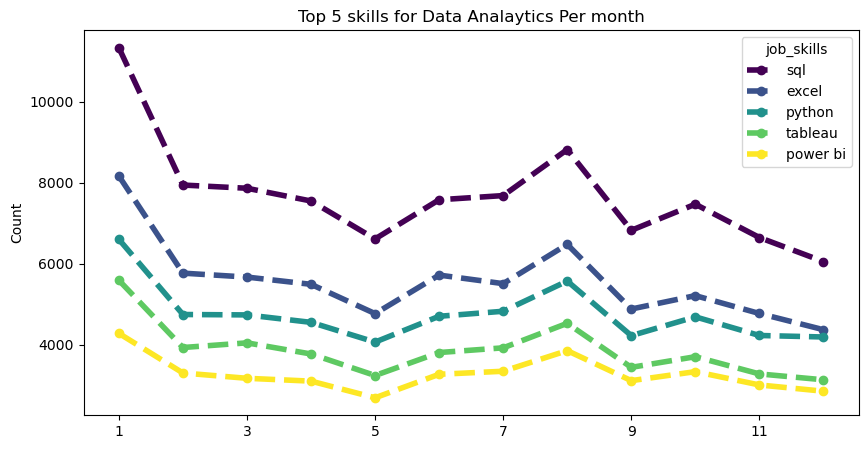

In [24]:
df_pivot.iloc[:, :5].plot(
    kind='line', 
    linewidth = 4,
    linestyle = '--',
    marker = 'o',
    markersize = 6,
    colormap = 'viridis',
    figsize=(10, 5)
)
plt.title("Top 5 skills for Data Analaytics Per month")
plt.ylabel("Count")
plt.xlabel("")
plt.show()

In [26]:
from adjustText import adjust_text

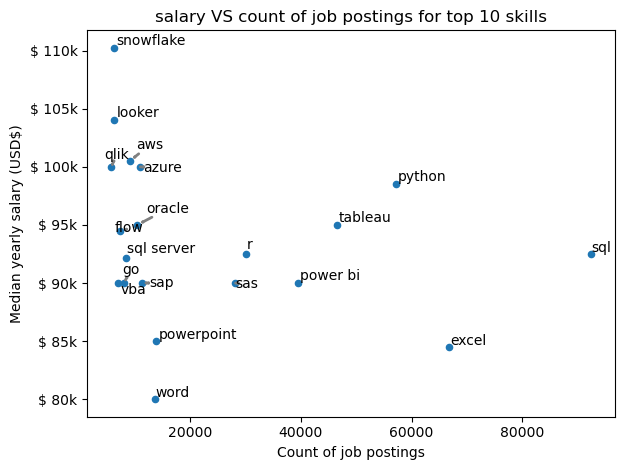

In [41]:
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)
skill_stats = skill_stats.sort_values(by = 'skill_count', ascending = False).head(20)
skill_stats.plot(kind = 'scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel("Count of job postings")
plt.ylabel("Median yearly salary (USD$)")
plt.title('salary VS count of job postings for top 10 skills')
plt.tight_layout()
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'$ {int(y / 1000)}k'))
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color = 'gray', lw=2))

plt.show()